# Interfacial Energy in Cahn-Hilliard Equation :

The system will adjust itself in such a way that 
> - if it takes very small $\nabla c$, then it will have a lot of contribution from bulk free energy
> - if it takes very large $ \nabla c $, this contribution will be lower. 

So the system chooses all interface which will be an optimum of these two. 
Therefore, the A and $\kappa$ together determine the interfacial energy. 

![picture](https://drive.google.com/file/d/1M3Y4zHCoCjWPKOuTdpLlgdHtEVcIsCuI/uc?usp=sharing)



In [5]:
# ---- importing libraries ---- #
import numpy as np
from matplotlib import pyplot as plt

0.16665994876649287 
 0.16667263674581223 
 0.3333325855123051


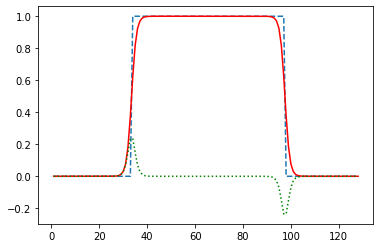

In [6]:
# ---- defining parameters ---- #

N = 128 # no. of grid points
dx = 1.0 # grid size

# composition vector 
x = np.zeros(N)
for i in range (0, N):
    x[i] = i + 1

# concentration vector
c = np.zeros(N)
for i in range (int(N/4 + 1), int(3*N / 4 + 1)) :
    c[i] = 1

# plotting the initial profile
plt.plot (x,c, linestyle = "dashed")        

halfN = N/2
delk = 2 * np.pi / N
dt = 0.5 # time step size

# ---- calculating non-linear part ---- #

g = np.zeros(N)
ghat = np.zeros(N)
chat = np.zeros (N)

# ---- starting the loops ---- #

for m in range (0,4000): # loop for time steps
    
    for j in range (0, N) : 
        g[j] = 2 * c[j] * (1 - c[j]) * (1 - 2*c[j])
    
    ghat = np.fft.fft(g) # calculating fft
    chat = np.fft.fft(c)
    
    for i in range (0,N) : # loop for nodal points
        
        # periodic boundary conditons 
        if ( i <= halfN ):
            k = i * delk
        if ( i > halfN ):
            k = (i-N) * delk
        
        k2 = k ** 2
        k4 = k2 ** 2
        # implementing actual updation 
        chat[i] = (chat[i] - dt * k2 * ghat[i]) / (1 + 2 * k4 * dt)
    
    c = np.real(np.fft.ifft(chat)) 

# plotting the final profile 
plt.plot(x,c, color = "red") 

chat = np.fft.fft(c) 

for i in range (0,N) :
        
        if ( i <= halfN ):
            k = i * delk
        if ( i > halfN ):
            k = (i-N) * delk
            
        chat[i] = np.complex(0,1) * k * chat[i]

cprime = np.zeros(N)
cprime = np.real(np.fft.ifft(chat))
plt.plot(x,cprime, color = "green", linestyle = "dotted")
kappa = 1.0
A = 1.0
energy1 = 0.0
energy2 = 0.0

for i in range (0, N) :
    energy1 = energy1 + A * c[i] * c[i] * (1-c[i]) * (1-c[i])
    energy2 = energy2 + kappa * cprime[i] * cprime[i]
       
print (0.5 * energy1, "\n", 0.5 * energy2, "\n", 0.5 * (energy1 + energy2))


Now if we take $\kappa$ = 4, the gradient contribution is going to be more. 

As the $\kappa$ contribution increases, the interfacial energy should be in sucha way that both the $\kappa$ contribution and the f contribution should become equal. 

We find that the Interfacial Energy is directly propertional to $\surd\kappa$.  